In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df_train = pd.read_csv("../data/imageTrainDataSet.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864,1
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843,1
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871,1
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000,1
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742,1


In [4]:
df_test = pd.read_csv("../data/imageTestDataSet.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,54.366787,0.0,0.0,...,97.608917,14.459713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,38.258987,0.0,19.445879,0.0,0.0,0.0,0.0,7.791460,0.0,0.0,...,59.617912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,41.004650,0.0,22.499952,0.0,0.0,0.0,0.0,1.438439,0.0,0.0,...,66.809647,12.714787,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,59.235928,0.0,0.000000,0.0,0.0,0.0,0.0,12.839417,0.0,0.0,...,37.821468,12.451595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,96.897903,6.766070,0.0,0.0,0.098201,0.0,0.0,0.0,0.0,1


In [5]:
X_train=df_train.drop("Target",axis=1)
y_train=df_train["Target"]

X_test=df_test.drop("Target",axis=1)
y_test=df_test["Target"]

In [6]:

lista_parametros = { 'criterion' : ['gini','entropy'],
                    'n_estimators' : [50,75,100,120, 150],
                    'max_depth' : [2, 4, 5, 10, None],
                    'min_samples_split' : [2,5,10], # Default = 2
                    'min_samples_leaf' : [1, 3,  5], # Default = 1
                    'max_features' : ['auto', 'sqrt', 'log2'], # Default = "auto"
                    'max_leaf_nodes' : [3, 4, 5, None],
                    'min_samples_leaf' : [1, 4, 10], # Default = 1
                    }
model = ensemble.RandomForestClassifier()

clf = GridSearchCV(estimator=model,param_grid=lista_parametros, n_jobs= -1)
clf.fit(X_train, y_train)

print("Best parameters:")
print()
print(clf.best_params_)
print()
print(clf.best_score_)

Best parameters:

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}

0.9149934810951761


In [7]:
model2 = ensemble.RandomForestClassifier(criterion='gini', max_depth=None, max_features='log2', max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=120)
model2.fit(X_train, y_train)
print(model2.score(X_test,y_test))

0.9223744292237442


In [8]:
Y_pred=model2.predict(X_test)

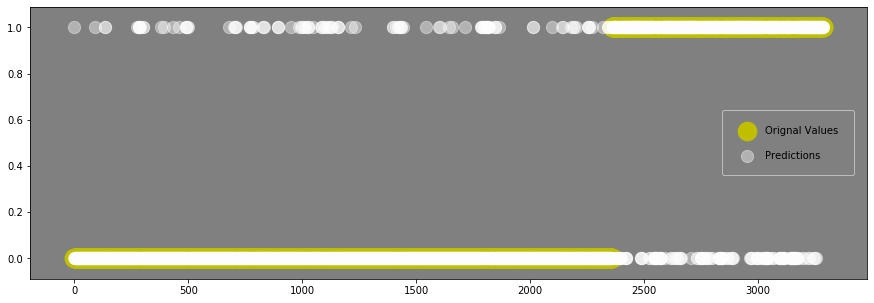

In [9]:

plt.figure(figsize=(15,5))
idx = np.argsort(y_test)
plt.rcParams['axes.facecolor'] = 'gray'

plt.scatter(range(len(y_test)), y_test.iloc[idx],label="Orignal Values",s=350,alpha=1,c='y')

plt.scatter(range(len(y_test)), Y_pred[idx],label="Predictions",s=150,alpha=0.4 ,c='w', edgecolors='w')

plt.legend(bbox_to_anchor=(0.99, 0.5),loc='center right',borderpad=1.5, labelspacing=1.5)

In [10]:
cfm=confusion_matrix(y_test, Y_pred)

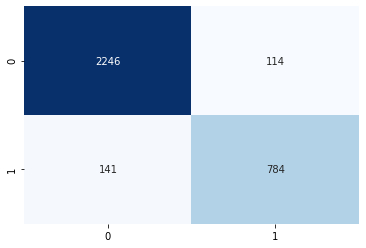

In [11]:
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")
